<a href="https://colab.research.google.com/github/Valiev-Koyiljon/MLBasics/blob/main/DecisionTree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Decision Tree

In [3]:
# uploading the file

from google.colab import files
upload = files.upload()

Saving iris.csv to iris.csv


In [15]:
# Import required Libraries:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline

from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report





In [16]:
# Data Loading
df = pd.read_csv('iris.csv')

# Data Cleaning:
df.replace([np.Inf, -np.Inf], np.nan, inplace = True)
df.replace(np.nan, 0, inplace = True)

# Seperate the data into input and output
X = df
Y = X['variety']
X.drop('variety', axis = 'columns', inplace = True)

# Labeling the output
le = LabelEncoder()
Y = le.fit_transform(Y)


2-part of code

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.88      0.94      0.91        16
           2       0.92      0.86      0.89        14

    accuracy                           0.93        45
   macro avg       0.94      0.93      0.93        45
weighted avg       0.93      0.93      0.93        45



Text(95.72222222222221, 0.5, 'Actual')

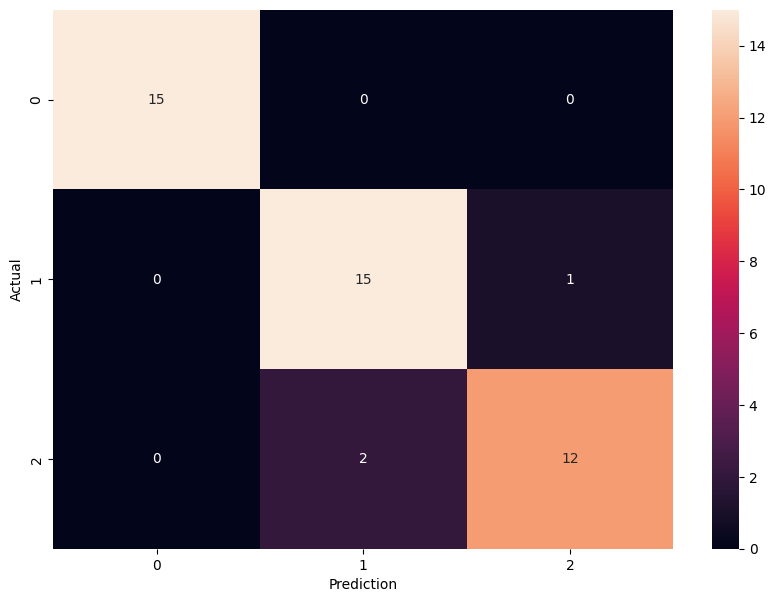

In [17]:
# Data Normalization
ms = MinMaxScaler()
X = ms.fit_transform(X)

# Split the data into train and test
xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size = 0.3, random_state = 5)

#the Decision Tree ML model
model = DecisionTreeClassifier(max_depth = 3, min_samples_leaf = 10, random_state = 1)

# Train the model
model.fit(xtrain, ytrain)

# Predict the output of the xtest data
pred = model.predict(xtest)

# Evaluation results of the ML model
cr = classification_report(ytest, pred)
print(cr)

# the confusion matrix
cm = confusion_matrix(ytest, pred)

# confusion matrix table
plt.figure(figsize = (10, 7))
sn.heatmap(cm, annot = True, fmt = 'd')
plt.xlabel('Prediction')
plt.ylabel('Actual')


### Drawing Decision Tree Graph

We trained Decision Tree model and we will draw the Decision Tree

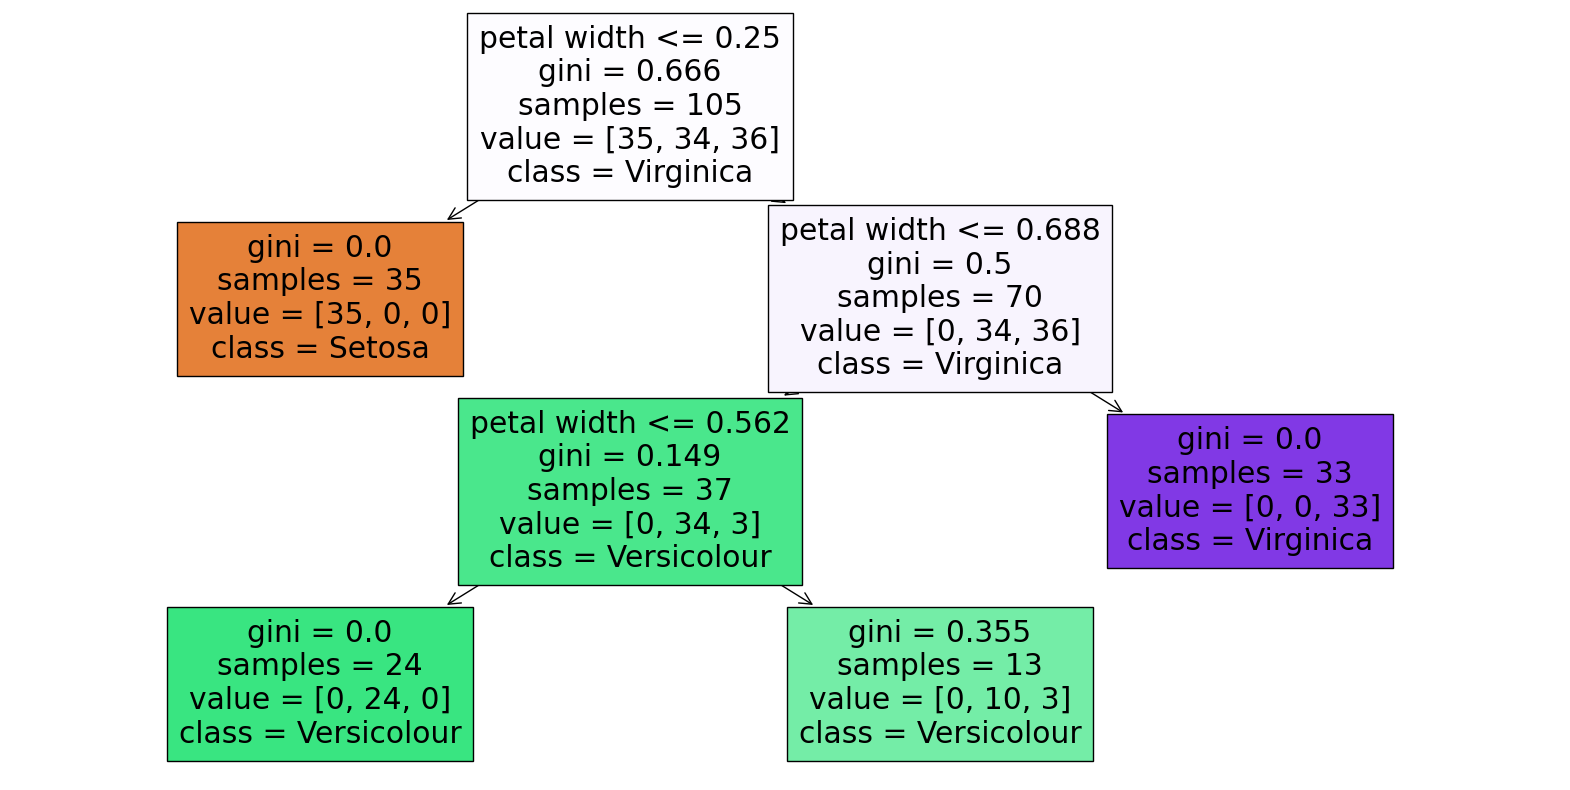

In [18]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt



# Drawing the Decision Tree
plt.figure(figsize=(20,10))
plot_tree(model, filled=True, feature_names=['sepal length', 'sepal width', 'petal length', 'petal width'], class_names=['Setosa', 'Versicolour', 'Virginica'])
plt.show()


##Checking. Observations

#We have a trained Decision Tree model

In [19]:
import pandas as pd



# New observations
observations = [3.5, 2.7, 1.7, 0.2]


# Step 1: Convert the new observation into Pandas dataframe
observations_df = pd.DataFrame([observations])



# Step 3: Normalize the observation (Assuming 'ms' is a pre-defined scaler from your training)
normalized_observations = ms.transform(observations_df)


# Step 4: Input the observation into the ML model to predict the class it belongs to
prediction = model.predict(normalized_observations)

print("The predicted class of the new observation is:", prediction[0])


The predicted class of the new observation is: 0


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
